In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from scipy.stats import entropy
from collections import defaultdict
import argparse
from matplotlib import pyplot as plt

def generate_plot(accuracy_scores_dict):
    """
    Generate a plot that contains the accuracy for each criterion in each iteration.
    """
    for criterion, accuracy_scores in accuracy_scores_dict.items():
        plt.plot(range(1, len(accuracy_scores) + 1), accuracy_scores, label=criterion)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [2]:
"""
 Dictionary that contains the accuracy scores for the uncertainty-entropy,
 for each train initials (using auto-encoder, ViT embeddings).
"""
initials = {'uncertainty_ViT': [0.5740740740740741,
              0.5383597883597884,
              0.611111111111111,
              0.6428571428571428,
              0.6693121693121693,
              0.6792328042328042,
              0.6957671957671957,
              0.673941798941799,
              0.6415343915343915,
              0.6461640211640212,
              0.6779100529100529,
              0.658068783068783,
              0.6785714285714285,
              0.6481481481481481,
              0.6567460317460317,
              0.6812169312169312,
              0.6646825396825397,
              0.6904761904761905,
              0.6891534391534391,
              0.6878306878306878],
           'uncertainty_ae': [0.5694444444444444,
              0.5383597883597884,
              0.611111111111111,
              0.6521164021164021,
              0.6693121693121693,
              0.6382275132275131,
              0.6957671957671957,
              0.6759259259259259,
              0.6415343915343915,
              0.6461640211640212,
              0.613095238095238,
              0.658068783068783,
              0.6785714285714285,
              0.6481481481481481,
              0.6567460317460317,
              0.6812169312169312,
              0.6646825396825397,
              0.6904761904761905,
              0.6891534391534391,
              0.6878306878306878]}

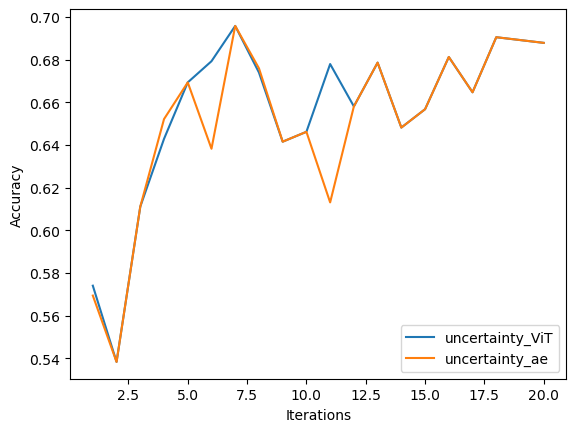

In [3]:
generate_plot(initials)

In [4]:
"""
 Dictionary that contains the accuracy scores for each criterion in the uncertainty-approach.
"""
uncertintiy = {'random': [0.5257936507936508,
              0.5634920634920635,
              0.5601851851851851,
              0.5912698412698413,
              0.6031746031746031,
              0.6177248677248677,
              0.6362433862433862,
              0.6408730158730158,
              0.6587301587301587,
              0.6693121693121693,
              0.621031746031746,
              0.6421957671957672,
              0.6461640211640212,
              0.6593915343915343,
              0.6355820105820106,
              0.6402116402116402,
              0.6316137566137566,
              0.662037037037037,
              0.6362433862433862,
              0.6395502645502645],
            'uncertainty_entropy': [0.5740740740740741,
              0.5383597883597884,
              0.611111111111111,
              0.6428571428571428,
              0.6693121693121693,
              0.6792328042328042,
              0.6957671957671957,
              0.673941798941799,
              0.6415343915343915,
              0.6461640211640212,
              0.6779100529100529,
              0.658068783068783,
              0.6785714285714285,
              0.6481481481481481,
              0.6567460317460317,
              0.6812169312169312,
              0.6646825396825397,
              0.6904761904761905,
              0.6891534391534391,
              0.6878306878306878],
             'uncertainty_ceal': [0.5654761904761905,
              0.5158730158730158,
              0.5092592592592592,
              0.5092592592592592,
              0.5119047619047619,
              0.5727513227513227,
              0.628968253968254,
              0.6190476190476191,
              0.6719576719576719,
              0.6706349206349206,
              0.664021164021164,
              0.6818783068783069,
              0.6878306878306878,
              0.6574074074074073,
              0.6712962962962963,
              0.6679894179894179,
              0.6798941798941799,
              0.6904761904761905,
              0.6898148148148148,
              0.6904761904761905],
            'pred_prob_based': [0.6064814814814814,
              0.5813492063492063,
              0.6091269841269841,
              0.5998677248677249,
              0.613095238095238,
              0.6144179894179894,
              0.6421957671957672,
              0.6408730158730158,
              0.6276455026455026,
              0.6342592592592592,
              0.6501322751322751,
              0.6574074074074073,
              0.6666666666666666,
              0.6593915343915343,
              0.6653439153439153,
              0.658068783068783,
              0.6812169312169312,
              0.6646825396825397,
              0.6752645502645502,
              0.6712962962962963],
              'competence_based': [0.5634920634920635,
              0.5899470899470899,
              0.5873015873015872,
              0.6144179894179894,
              0.6078042328042328,
              0.6521164021164021,
              0.6190476190476191,
              0.66005291005291,
              0.6514550264550264,
              0.6369047619047619,
              0.6719576719576719,
              0.6593915343915343,
              0.6990740740740741,
              0.664021164021164,
              0.6825396825396826,
              0.6779100529100529,
              0.6752645502645502,
              0.6990740740740741,
              0.6865079365079365,
              0.6871693121693121],
              }

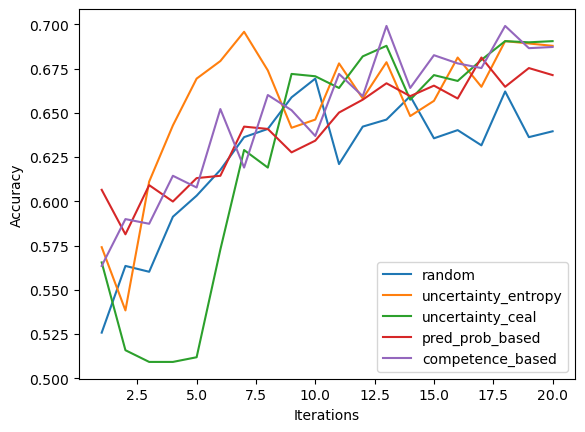

In [5]:
generate_plot(uncertintiy)

In [6]:
"""
 Dictionary that contains the accuracy scores for the deepfool approach using different budgets.
"""
deepfool = {'adversial_attack_200': [0.625,
              0.6025132275132274,
              0.5965608465608465,
              0.5945767195767195,
              0.5687830687830687,
              0.5846560846560847], 
           'adversial_attack_100': [0.49867724867724866,
              0.5654761904761905,
              0.5575396825396826,
              0.5793650793650793,
              0.5787037037037037,
              0.5092592592592592]}

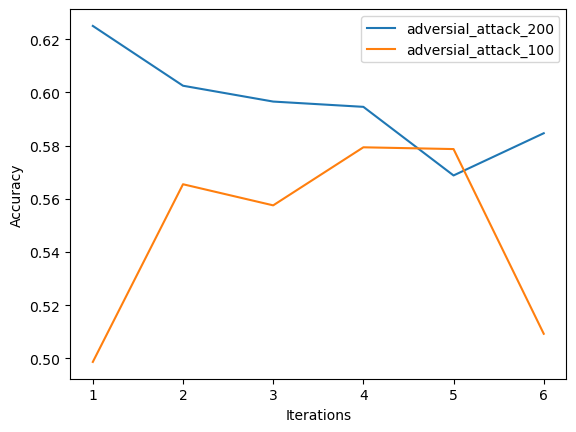

In [7]:
generate_plot(deepfool)

In [8]:
"""
 Dictionary that contains the accuracy scores for each criterion in the density-approach.
"""
density = {'random': [0.5257936507936508,
              0.5634920634920635,
              0.5601851851851851,
              0.5912698412698413,
              0.6031746031746031,
              0.6177248677248677,
              0.6362433862433862,
              0.6408730158730158,
              0.6587301587301587,
              0.6693121693121693,
              0.621031746031746,
              0.6421957671957672,
              0.6461640211640212,
              0.6593915343915343,
              0.6355820105820106,
              0.6402116402116402,
              0.6316137566137566,
              0.662037037037037,
              0.6362433862433862,
              0.6395502645502645],
            'uncertainty_entropy': [0.5740740740740741,
              0.5383597883597884,
              0.611111111111111,
              0.6428571428571428,
              0.6693121693121693,
              0.6792328042328042,
              0.6957671957671957,
              0.673941798941799,
              0.6415343915343915,
              0.6461640211640212,
              0.6779100529100529,
              0.658068783068783,
              0.6785714285714285,
              0.6481481481481481,
              0.6567460317460317,
              0.6812169312169312,
              0.6646825396825397,
              0.6904761904761905,
              0.6891534391534391,
              0.6878306878306878],
          'kmeans_num_classes_nearst_farthest': [0.5608465608465608,
              0.6355820105820106,
              0.6335978835978836,
              0.6382275132275131,
              0.625,
              0.6395502645502645,
              0.6461640211640212,
              0.6699735449735449,
              0.6124338624338624,
              0.6693121693121693,
              0.6554232804232804,
              0.6157407407407407,
              0.6402116402116402,
              0.6699735449735449,
              0.6633597883597884,
              0.6329365079365079,
              0.6309523809523809,
              0.6283068783068783,
              0.6283068783068783,
              0.6435185185185185],
          'similarity_based': [0.4821428571428571,
              0.5621693121693121,
              0.5582010582010581,
              0.5595238095238095,
              0.5667989417989417,
              0.6197089947089947,
              0.6481481481481481,
              0.6395502645502645,
              0.6177248677248677,
              0.6296296296296295,
              0.6375661375661376,
              0.6501322751322751,
              0.613095238095238,
              0.6362433862433862,
              0.5958994708994708,
              0.6402116402116402,
              0.6507936507936507,
              0.6421957671957672,
              0.6507936507936507,
              0.6527777777777778]}

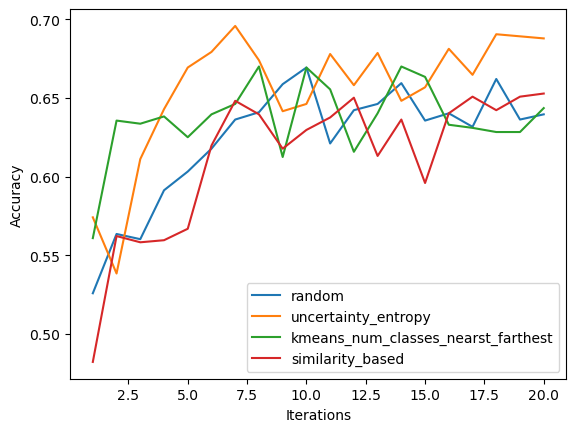

In [9]:
generate_plot(density)

In [10]:
"""
 Dictionary that contains the accuracy scores for each criterion in the hybrid-approach.
"""
hybrid ={'random': [0.5257936507936508,
              0.5634920634920635,
              0.5601851851851851,
              0.5912698412698413,
              0.6031746031746031,
              0.6177248677248677,
              0.6362433862433862,
              0.6408730158730158,
              0.6587301587301587,
              0.6693121693121693,
              0.621031746031746,
              0.6421957671957672,
              0.6461640211640212,
              0.6593915343915343,
              0.6355820105820106,
              0.6402116402116402,
              0.6316137566137566,
              0.662037037037037,
              0.6362433862433862,
              0.6395502645502645],
            'uncertainty_entropy': [0.5740740740740741,
              0.5383597883597884,
              0.611111111111111,
              0.6428571428571428,
              0.6693121693121693,
              0.6792328042328042,
              0.6957671957671957,
              0.673941798941799,
              0.6415343915343915,
              0.6461640211640212,
              0.6779100529100529,
              0.658068783068783,
              0.6785714285714285,
              0.6481481481481481,
              0.6567460317460317,
              0.6812169312169312,
              0.6646825396825397,
              0.6904761904761905,
              0.6891534391534391,
              0.6878306878306878],
         'BADGE': [0.47817460317460314,
              0.6038359788359788,
              0.6071428571428571,
              0.5952380952380952,
              0.628968253968254,
              0.6084656084656084,
              0.6435185185185185,
              0.613095238095238,
              0.6197089947089947,
              0.625,
              0.6448412698412698,
              0.6461640211640212,
              0.6673280423280423,
              0.6633597883597884,
              0.6514550264550264,
              0.6646825396825397,
              0.6759259259259259,
              0.6679894179894179,
              0.6521164021164021,
              0.66005291005291],
         'uncertainty_kmeans': [0.5198412698412698,
              0.6329365079365079,
              0.6183862433862434,
              0.6236772486772486,
              0.6428571428571428,
              0.656084656084656,
              0.6177248677248677,
              0.6699735449735449,
              0.6673280423280423,
              0.673941798941799,
              0.6574074074074073,
              0.6402116402116402,
              0.6428571428571428,
              0.6660052910052909,
              0.6818783068783069,
              0.6626984126984127,
              0.6924603174603174,
              0.693121693121693,
              0.691137566137566,
              0.693121693121693],
         'custom': [0.46825396825396826,
              0.5727513227513227,
              0.5932539682539683,
              0.6203703703703703,
              0.5978835978835979,
              0.5866402116402116,
              0.6183862433862434,
              0.6084656084656084,
              0.5773809523809523,
              0.5939153439153438,
              0.6243386243386243,
              0.6263227513227513,
              0.613095238095238,
              0.6342592592592592,
              0.6342592592592592,
              0.6514550264550264,
              0.6117724867724867,
              0.6388888888888888,
              0.6593915343915343,
              0.6461640211640212]}

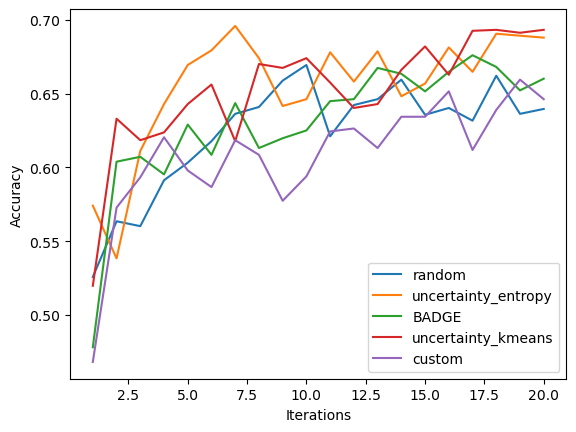

In [11]:
generate_plot(hybrid)

In [12]:
"""
 Dictionary that contains the accuracy scores for the K-means approach, in three different ways.
"""
kmeans = {'kmeans_num_classes_nearst_7': [0.537037037037037,
              0.5112433862433862,
              0.5376984126984127,
              0.5224867724867724,
              0.5582010582010581,
              0.5621693121693121,
              0.580026455026455,
              0.5925925925925926,
              0.5582010582010581,
              0.5892857142857143,
              0.6355820105820106,
              0.5853174603174602,
              0.6183862433862434,
              0.5972222222222222,
              0.6091269841269841,
              0.5687830687830687,
              0.5833333333333333,
              0.5899470899470899,
              0.6243386243386243,
              0.6011904761904762],
          'kmeans_num_classes_nearst_farthest': [0.5608465608465608,
              0.6355820105820106,
              0.6335978835978836,
              0.6382275132275131,
              0.625,
              0.6395502645502645,
              0.6461640211640212,
              0.6699735449735449,
              0.6124338624338624,
              0.6693121693121693,
              0.6554232804232804,
              0.6157407407407407,
              0.6402116402116402,
              0.6699735449735449,
              0.6633597883597884,
              0.6329365079365079,
              0.6309523809523809,
              0.6283068783068783,
              0.6283068783068783,
              0.6435185185185185],
         'kmeans_budget': [0.5277777777777778,
              0.5687830687830687,
              0.6064814814814814,
              0.5853174603174602,
              0.6236772486772486,
              0.621031746031746,
              0.583994708994709,
              0.5767195767195767,
              0.566137566137566,
              0.5965608465608465,
              0.5687830687830687,
              0.5939153439153438,
              0.6216931216931216,
              0.5945767195767195,
              0.6223544973544973,
              0.5813492063492063,
              0.6064814814814814,
              0.6375661375661376,
              0.6005291005291005,
              0.6461640211640212],
         }

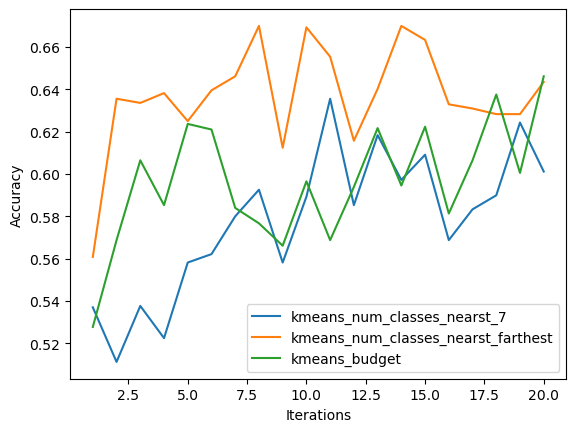

In [13]:
generate_plot(kmeans)

In [35]:
def generate_plot(accuracy_scores_dict, title):
    """
    Generate a plot
    """
    for criterion, accuracy_scores in accuracy_scores_dict.items():
        plt.plot(range(1, len(accuracy_scores) + 1), accuracy_scores, label=criterion)
    plt.ylim(0.45, 0.7)
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [36]:
di_60 = {'competence_based': [0.5403439153439153,
              0.6164021164021164,
              0.6164021164021164,
              0.6468253968253967,
              0.6302910052910052,
              0.656084656084656,
              0.6441798941798942,
              0.664021164021164,
              0.6838624338624338,
              0.6765873015873015,
              0.6792328042328042,
              0.6779100529100529,
              0.6468253968253967,
              0.6567460317460317,
              0.6646825396825397,
              0.6798941798941799,
              0.6964285714285714,
              0.66005291005291,
              0.6547619047619048,
              0.6660052910052909],
         'BADGE': [0.47817460317460314,
              0.6038359788359788,
              0.6071428571428571,
              0.5952380952380952,
              0.628968253968254,
              0.6084656084656084,
              0.6435185185185185,
              0.613095238095238,
              0.6197089947089947,
              0.625,
              0.6448412698412698,
              0.6461640211640212,
              0.6673280423280423,
              0.6633597883597884,
              0.6514550264550264,
              0.6646825396825397,
              0.6759259259259259,
              0.6679894179894179,
              0.6521164021164021,
              0.66005291005291],
         'uncertainty_ceal': [0.5654761904761905,
              0.5158730158730158,
              0.5092592592592592,
              0.5092592592592592,
              0.5119047619047619,
              0.5727513227513227,
              0.628968253968254,
              0.6190476190476191,
              0.6719576719576719,
              0.6706349206349206,
              0.664021164021164,
              0.6818783068783069,
              0.6878306878306878,
              0.6574074074074073,
              0.6712962962962963,
              0.6679894179894179,
              0.6798941798941799,
              0.6904761904761905,
              0.6898148148148148,
              0.6904761904761905]
        }

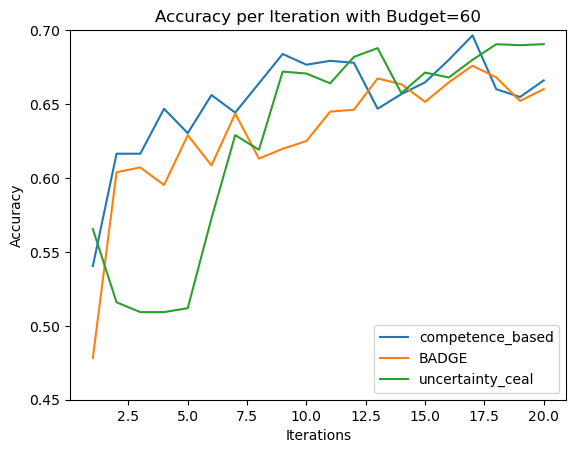

In [37]:
generate_plot(di_60, "Accuracy per Iteration with Budget=60")

In [38]:
di_30 = {'competence_based': [0.5105820105820106,
              0.548941798941799,
              0.5906084656084656,
              0.5886243386243386,
              0.611111111111111,
              0.6309523809523809,
              0.6362433862433862,
              0.6349206349206349,
              0.6302910052910052,
              0.6051587301587301,
              0.6177248677248677,
              0.6488095238095237,
              0.6507936507936507,
              0.6765873015873015,
              0.6554232804232804,
              0.6461640211640212,
              0.6686507936507936,
              0.6488095238095237,
              0.673941798941799,
              0.6574074074074073],
         'BADGE': [0.5158730158730158,
              0.6071428571428571,
              0.6388888888888888,
              0.611111111111111,
              0.6197089947089947,
              0.6441798941798942,
              0.6362433862433862,
              0.6448412698412698,
              0.6276455026455026,
              0.6011904761904762,
              0.6322751322751322,
              0.6276455026455026,
              0.6104497354497355,
              0.6329365079365079,
              0.6223544973544973,
              0.6428571428571428,
              0.6276455026455026,
              0.6501322751322751,
              0.6157407407407407,
              0.6507936507936507],
         'uncertainty_ceal' : [0.5376984126984127,
              0.5085978835978836,
              0.5218253968253967,
              0.5138888888888888,
              0.5132275132275133,
              0.5277777777777778,
              0.5509259259259259,
              0.5998677248677249,
              0.6329365079365079,
              0.6243386243386243,
              0.6441798941798942,
              0.6455026455026455,
              0.6223544973544973,
              0.6521164021164021,
              0.5925925925925926,
              0.6369047619047619,
              0.6474867724867724,
              0.6203703703703703,
              0.6018518518518519,
              0.6216931216931216]
        }

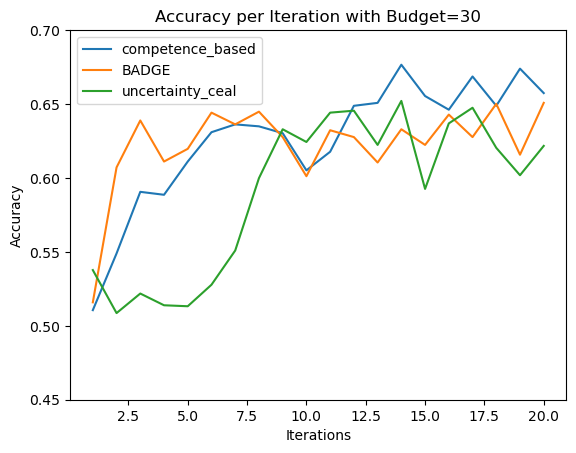

In [39]:
generate_plot(di_30, "Accuracy per Iteration with Budget=30")